# CNN  MNIST database of handwritten digits

In [3]:
# mnist (benchmark) dataset

# It is a dataset of handwritten images

# http://yann.lecun.com/exdb/mnist/


# The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, 
# and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been
# size-normalized and centered in a fixed-size image.

# It is a good database for people who want to try learning techniques and pattern recognition methods on real-world 
# data while spending minimal efforts on preprocessing and formatting.'''

In [4]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


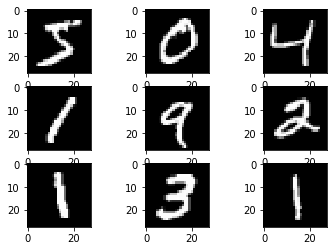

In [6]:
# Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images

for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    
# show the figure
pyplot.show()

In [7]:
img_rows, img_cols=28, 28

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
if k.image_data_format() == 'channels_first': 
    #reshape dataset to have a single channel          
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)        # (60000, 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    inpx = (1, img_rows, img_cols) 
else:
    #reshape dataset to have a single channel
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)        # (60000, 28, 28,1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    inpx = (img_rows, img_cols, 1)


In [10]:
#convert from integers to floats
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# Normalization. 0 to 1
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

In [11]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
# To prevent overfitting 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6)

model = Model([inpx], layer7) 

In [12]:
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=15, batch_size=500)

Epoch 1/10
120/120 [==============================] - 110s 915ms/step - loss: 2.4346 - accuracy: 0.1022
Epoch 2/10
120/120 [==============================] - 109s 912ms/step - loss: 2.4191 - accuracy: 0.1022
Epoch 3/10
120/120 [==============================] - 108s 900ms/step - loss: 2.4043 - accuracy: 0.1022
Epoch 4/10
120/120 [==============================] - 109s 909ms/step - loss: 2.3899 - accuracy: 0.1022
Epoch 5/10
120/120 [==============================] - 120s 999ms/step - loss: 2.3762 - accuracy: 0.1022
Epoch 6/10
120/120 [==============================] - 193s 2s/step - loss: 2.3636 - accuracy: 0.1022
Epoch 7/10
120/120 [==============================] - 222s 2s/step - loss: 2.3510 - accuracy: 0.1022
Epoch 8/10
120/120 [==============================] - 213s 2s/step - loss: 2.3393 - accuracy: 0.1022
Epoch 9/10
120/120 [==============================] - 228s 2s/step - loss: 2.3284 - accuracy: 0.1022
Epoch 10/10
120/120 [==============================] - 123s 1s/step - loss: 

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])

loss= 2.310285806655884
accuracy= 0.10100000351667404


In [15]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[2])))

0


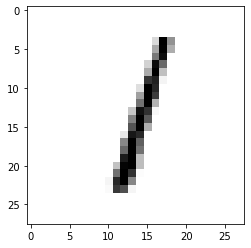

In [16]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()